In [1]:
interactive = False  # Set this variable to True to run an interactive
                     # simulator. This will not work on CoCalc.

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import pylab
import random
import numpy as np

In [2]:
class TrafficSimulator(object):


    def __init__(self, length=50, density=0.2, interactive=False, max_velocity = 5, p = 0.):
        '''
        Initialize new TrafficSimulator objects with the default parameter
        settings.

        Inputs:

         * length (int) The number of cells in the cellular automaton.
           Default: 50.

         * density (float) The proportion of cells that will be active (contain
           a car) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.2.

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). Default: False.

        '''
        self.interactive = interactive
        self.length = length
        self.density = density
        self.max_velocity = max_velocity
        self.p = p
        self.count_cars = 0
        self.time = 0

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.zeros(self.length)
        self.next_state = np.full(self.length, -1)

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
        random_indices = np.random.choice(
            range(self.length),
            size=int(round(self.density * self.length)),
            replace=False)
        self.current_state.fill(-1)
        self.current_state[random_indices] = 0

        self.count_cars = 0
        self.time = 0

    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in range(0, self.length):
            if self.current_state[i] != -1:
                
                if self.current_state[i] < self.max_velocity:
                    self.current_state[i] += 1
                
                
                for j in range(int(self.current_state[i])):
                    if self.current_state[(i + j +1)%self.length] != -1:
                        self.current_state[i] = j
                        break
                        
                if self.current_state[i] >= 1 and random.random() <= self.p:
                    self.current_state[i] -= 1
                    
                next_indice = int(i + self.current_state[i]) % self.length
                self.next_state[next_indice] = self.current_state[i]
                self.current_state
                if i + self.current_state[i] > self.length:
                    self.count_cars += 1
        
        self.current_state, self.next_state = self.next_state, np.full(self.length, -1)
        self.time += 1

    def set_density(self, value=None):
        '''
        The density of cars on the road. Only affects initialization (reset) of
        the simulation. The density must be a value between 0 and 1.
        '''
        if value is not None:
            self.density = min(1, max(0, float(value)))
        return self.density
    
    def display(self):
        print(''.join('.' if x == -1 else str(int(x)) for x in self.current_state))

In [3]:
sim = TrafficSimulator(length=100, density=0.13, interactive=interactive, p=0.5)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
    gui.start(func=[sim.initialize, sim.draw, sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.display()

    print('Next 5 states:')
    for i in range(5):
        sim.step()
        sim.display()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.step()
    sim.display()

Initial state:
.0.0...0...0...................0...........0....0...............0..............0.0.0..........0...0.
Next 5 states:
..1.1..0...0....................1..........0.....1...............1.............0.0.0...........1..0.

...1..2.1...1.....................2........0.......2...............2...........0.0..1...........1.0.

....1..1..2..1......................2......0.........2................3........0..1...2..........1.1

1....1..1..1...2......................2.....1..........2..................4....0...1.....3.......0..

.1....1...2.1....2......................2.....2...........3..................3..1....2.......4...0..

After 100 steps:
0....1..2...2...........................5...........5....4.............5................5....2.1.0.0


In [4]:
import matplotlib.pyplot as plt

In [5]:
densities = np.arange(0.03, 0.84, 0.03)
traffic_flow = []

for density in densities:
    
    sim = TrafficSimulator(length=100, density=density, interactive=interactive, p=0.3)
    sim.initialize()
    
    for i in range(1000):
        sim.step()
    traffic_flow.append(sim.count_cars/sim.time)



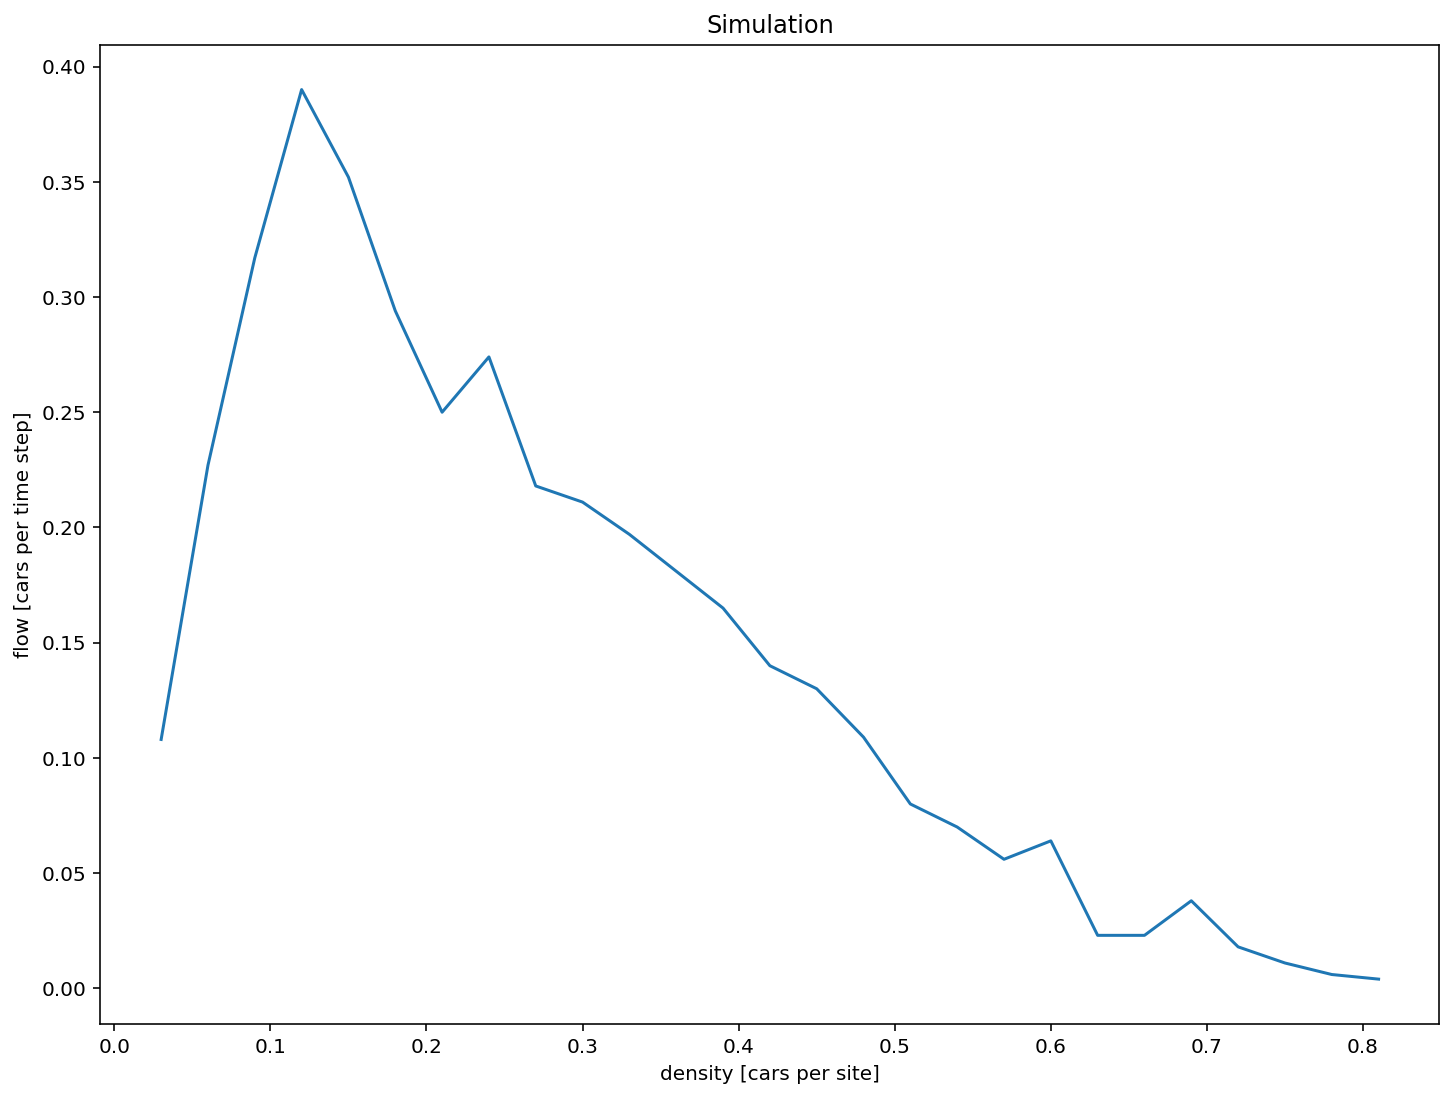

In [10]:
plt.figure(figsize=(12, 9))
plt.title('Simulation')
plt.plot(densities, traffic_flow)
plt.xlabel('density [cars per site]')
plt.ylabel('flow [cars per time step]')
plt.show()